In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [25]:
data = pd.read_csv("Population_Data.csv")
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [27]:
numeric = ["Indians",'Foreigners','Indian_Male','Indian_Female',
           'Foreigners_Female','Foreigners_Male','Total Population'] 

In [28]:
def cleaner(z):
    return z.replace(',','')

In [29]:
for i in data[numeric]:
    data[i] = data[i].apply(cleaner)
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [30]:
data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [31]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [32]:
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

In [33]:
MF_sum = data['Indian_Male'] + data['Indian_Female'] + data['Foreigners_Male']+ data['Foreigners_Female']
data['Other'] = data['Total Population'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [34]:
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

In [35]:
data1 = data.drop(columns=['Region','Office Location Id','Total Population'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


In [37]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1, columns=columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [61]:
pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [62]:
len(pred)

38

In [63]:
kmeans.inertia_

0.028113285898827122

In [64]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

c:\users\shreya\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\shreya\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\shreya\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\shreya\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was depr

In [65]:
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})

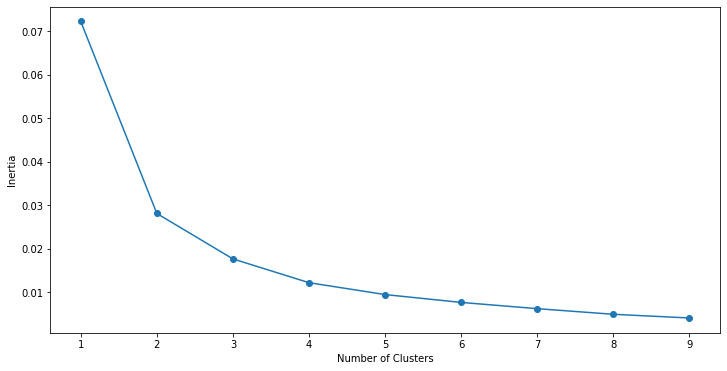

In [67]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [75]:
data1['cluster'] = pred
data1.head(10)

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Other,cluster
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666,1
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728,1
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950,1
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092,1
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544,2
5,0.189933,0.698689,0.166697,0.023236,0.668407,0.005031,0.025251,1
6,0.118499,0.707917,0.096517,0.021982,0.689077,0.011379,0.007461,2
7,0.131558,0.704556,0.089750,0.041808,0.690152,0.013378,0.001027,2
8,0.116776,0.707740,0.087786,0.028990,0.690475,0.011387,0.005877,2
9,0.133395,0.705656,0.089055,0.044340,0.688563,0.015363,0.001730,2
